In [3]:
#Twitter Sentiment Analysis
# Shreyas Prakash-19BCE2111
# Balusu Tarun Kumar-19BCE0067
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#extreme learning
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#Reading the csv file
data=pd.read_csv(r"C:\Users\Shreyas\training.1600000.processed.noemoticon.csv")

In [5]:
data.columns=['target', 'id', 'date', 'flag', 'user', 'text']

In [6]:
data.head()

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [7]:
data.describe()

,target,id
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   id      1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [9]:
data.corr()

,target,id
target,1.000000,-0.261604
id,-0.261604,1.000000


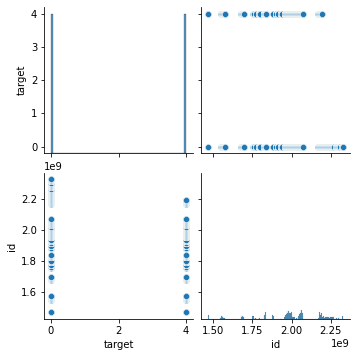

In [10]:
#!pip install seaborn
import seaborn as sns
sns.pairplot(data)

In [11]:
#Checking for null values in the dataset
np.sum(data.isnull().any(axis=1))

0

In [12]:
#Now we will clean the data. 
#We will remove the stopwords, URLs, emails, punctuations, numbers present in the text to simplify our task of classifying the 
#text into positive or negative sentiment

In [13]:
#First we take the most important attributes of the dataset alone and work with them.
data=data[['text','target']]

In [14]:
#The label for positive data is 4. We are converting it to 1.
data['target'][data['target']==4]=1
data.head()

<ipython-input-14-8eb66b4a6a96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'][data['target']==4]=1
C:\Users\Shreyas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


,text,target
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0


In [15]:
#Separating positive and negative tweets
positive_data=data[data['target'] == 1]
negative_data=data[data['target'] == 0]

In [16]:
#Taking the first 20000 columns of data from positve_data and negative_data respectively to run the machine easily
positive_data=positive_data.iloc[:int(10000)]
negative_data=negative_data.iloc[:int(10000)]

In [17]:
#Concatinating the positive and negative data into one file
data=pd.concat([positive_data,negative_data])

In [18]:
#Converting the text into lowercase
data['text']=data['text'].str.lower()
data.head()

,text,target
799999,i love @health4uandpets u guys r the best!!,1
800000,im meeting up with one of my besties tonight! ...,1
800001,"@darealsunisakim thanks for the twitter add, s...",1
800002,being sick can be really cheap when it hurts t...,1
800003,@lovesbrooklyn2 he has that effect on everyone,1


In [19]:
#!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shreyas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
#Importing stopwords in english
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [21]:
#Removing stopwords from the text
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

799999                love @health4uandpets u guys r best!!
800000    im meeting one besties tonight! cant wait!! - ...
800001    @darealsunisakim thanks twitter add, sunisa! g...
800002    sick really cheap hurts much eat real food plu...
800003                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [22]:
#Removing the punctuations from the text
import string
punctuations = string.punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations)
    return text.translate(translator)
data['text'] = data['text'].apply(lambda text: cleaning_punctuations(text))
data['text'].head()

799999                   love health4uandpets u guys r best
800000    im meeting one besties tonight cant wait  girl...
800001    darealsunisakim thanks twitter add sunisa got ...
800002    sick really cheap hurts much eat real food plu...
800003                       lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [23]:
#Removing repeating characters
import re
def removing_repeating_characters(text):
    return re.sub(r'(.)\1+', r'\1', text)
data['text'] = data['text'].apply(lambda text: removing_repeating_characters(text))
data['text'].head()

799999                   love health4uandpets u guys r best
800000    im meting one besties tonight cant wait girl talk
800001    darealsunisakim thanks twiter ad sunisa got me...
800002    sick realy cheap hurts much eat real fod plus ...
800003                         lovesbroklyn2 efect everyone
Name: text, dtype: object

In [24]:
#Removing the @ symbol present in emails
def clean_emails(text):
    return re.sub(r'@[^\s]+',' ',text)
data['text'] = data['text'].apply(lambda text: clean_emails(text))
data['text'].head()

799999                   love health4uandpets u guys r best
800000    im meting one besties tonight cant wait girl talk
800001    darealsunisakim thanks twiter ad sunisa got me...
800002    sick realy cheap hurts much eat real fod plus ...
800003                         lovesbroklyn2 efect everyone
Name: text, dtype: object

In [25]:
#Removing numbers present in the data
def remove_numbers(text):
    return re.sub(r'[0-9]',' ',text)
data['text'] = data['text'].apply(lambda text: remove_numbers(text))
data['text'].head()

799999                   love health uandpets u guys r best
800000    im meting one besties tonight cant wait girl talk
800001    darealsunisakim thanks twiter ad sunisa got me...
800002    sick realy cheap hurts much eat real fod plus ...
800003                         lovesbroklyn  efect everyone
Name: text, dtype: object

In [26]:
#Removing links present in the data
def remove_URLs(text):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
data['text'] = data['text'].apply(lambda text: remove_numbers(text))
data['text'].head()

799999                   love health uandpets u guys r best
800000    im meting one besties tonight cant wait girl talk
800001    darealsunisakim thanks twiter ad sunisa got me...
800002    sick realy cheap hurts much eat real fod plus ...
800003                         lovesbroklyn  efect everyone
Name: text, dtype: object

In [27]:
#Converting the text into tokens to make the analysis easier
from nltk.tokenize import RegexpTokenizer
tokenization =  RegexpTokenizer(r'\w+')
data["text"] = data["text"].astype(str)
data['text'] = data['text'].apply(tokenization.tokenize)
data['text'].head()

799999           [love, health, uandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

In [28]:
#Stemming is applied on the words. This process reduces the word to its root form. In stemming the root form of the word
# may not be an actual word.
stemming = nltk.PorterStemmer()
def stemming_text(data):
    text = [stemming.stem(word) for word in data]
    return data
data['text']= data['text'].apply(lambda text: stemming_text(text))
data['text'].head()

799999           [love, health, uandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

In [29]:
#Lemmatization is applied on the words. This process also reduces the word to its root form. But in lemmatization the root 
#form of the word is an actual word.
import nltk
nltk.download('wordnet')
lemmatizer = nltk.WordNetLemmatizer()
def lemmatize_text(data):
    text = [lemmatizer.lemmatize(word) for word in data]
    return data
data['text'] = data['text'].apply(lambda text: lemmatize_text(text))
data['text'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shreyas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


799999           [love, health, uandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

In [30]:
# This where the text part of the dataset is converted into a matrix full of int values. This converts the text into a sequence 
# integers. The max_len depends on the amount of data used for training the model. Suppose if 80% is used for training, then 
# the max_len will be 80% of total number of columns. After initializing the max_len, we can conert the text into an integer
# matrix.
#!pip install --upgrade pip
#!pip install tensorflow --user
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
X=data['text']
y=data['target']
max_len = 500
tokens = Tokenizer(num_words=2000)
tokens.fit_on_texts(X)
sequences = tokens.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
print(sequences_matrix)

[[   0    0    0 ...  148  252  106]
 [   0    0    0 ...   76  216  247]
 [   0    0    0 ...  283  139 1072]
 ...
 [   0    0    0 ... 1908  131    6]
 [   0    0    0 ...    0   95    3]
 [   0    0    0 ...  183   36    7]]


In [ ]:
#The rest of the code demonstrates the prediction using neural networks

In [31]:
# Here we define the tensorflow model. The various libraries from tensorflow are imported and the parameters such as  
# the activation function, Droupout, LSTM  are set for the tensorflow model.
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
def tensorflow_based_model(): 
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(2000,50,input_length=max_len)(inputs) 
    layer = LSTM(64)(layer) 
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer) 
    layer = Dropout(0.5)(layer) 
    layer = Dense(1,name='out_layer')(layer) 
    layer = Activation('sigmoid')(layer) 
    model = Model(inputs=inputs,outputs=layer) 
    return model

In [32]:
#Here the model is defined and a set of parameters are defined.
from tensorflow.keras.optimizers import RMSprop
model = tensorflow_based_model() 
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])  

In [33]:
#Train_test split is done on the datset and the model is fitted by giving a value to the batch size and epochs
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sequences_matrix, y, test_size=0.2)
fitting=model.fit(X_train,y_train,batch_size=70,epochs=7, validation_split=0.1)

Epoch 1/7
206/206 [==============================] - 144s 672ms/step - loss: 0.6025 - accuracy: 0.6633 - val_loss: 0.5467 - val_accuracy: 0.7181
Epoch 2/7
206/206 [==============================] - 83s 401ms/step - loss: 0.5094 - accuracy: 0.7503 - val_loss: 0.5461 - val_accuracy: 0.7212
Epoch 3/7
206/206 [==============================] - 60s 294ms/step - loss: 0.4830 - accuracy: 0.7672 - val_loss: 0.5494 - val_accuracy: 0.7206
Epoch 4/7
206/206 [==============================] - 63s 305ms/step - loss: 0.5245 - accuracy: 0.7503 - val_loss: 0.5413 - val_accuracy: 0.7369
Epoch 5/7
206/206 [==============================] - 64s 310ms/step - loss: 0.4669 - accuracy: 0.7772 - val_loss: 0.5533 - val_accuracy: 0.7319
Epoch 6/7
206/206 [==============================] - 65s 316ms/step - loss: 0.4699 - accuracy: 0.7767 - val_loss: 0.5505 - val_accuracy: 0.7325
Epoch 7/7
206/206 [==============================] - 66s 321ms/step - loss: 0.4373 - accuracy: 0.7938 - val_loss: 0.5827 - val_accuracy

In [35]:
# Predictions are done by setting a threshold. If the model predicts a value of more than 0.5 it is a positive tweet else it is 
# a negative tweet.
predictions=model.predict(X_test)
predictions=predictions>0.5

In [38]:
# The accuracy_score, precision_score, f1_score, recall_score are calculated based on the predictions.
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions))
print('f1 score: ', f1_score(y_test, predictions))
print('Recall score:', recall_score(y_test, predictions))

Accuracy:  0.711
Precision:  0.7767857142857143
f1 score:  0.678173719376392
Recall score: 0.6017786561264822


Confusion Matrix:
 [[1626  350]
 [ 806 1218]]


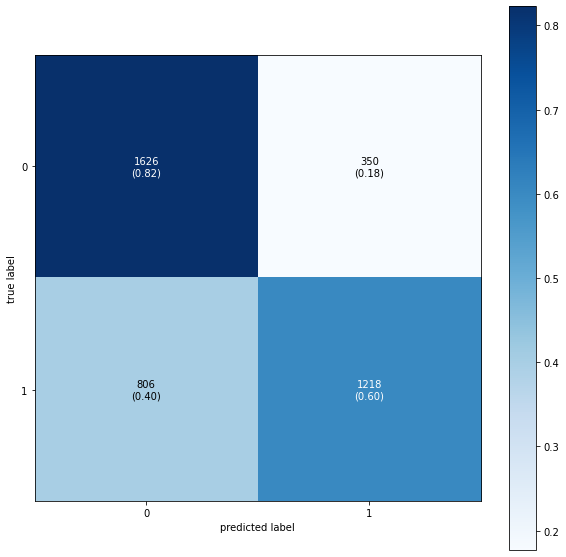

In [39]:
#Printing the confusion matrix based on the above predictions.
#!pip install mlxtend
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
confusionMatrix=confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusionMatrix)

fig, ax = plot_confusion_matrix(conf_mat=confusionMatrix,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

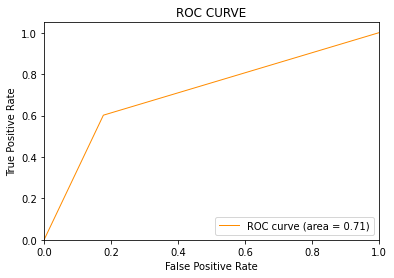

In [40]:
#Printing the ROC curve based on the above predictions.
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()